**классификатор изображений MPL**

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

# from tensorflow.keras.layers import Activation
# from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils 


In [2]:
np.random.seed(1671)

In [3]:
# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
NB_CLASSES = len(set(y_train))
# NB_CLASSES

In [5]:
# X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = X_train.shape[1]*X_train.shape[2]
RESHAPED

784

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(60000, RESHAPED).astype('float32')
X_test = X_test.reshape(10000, RESHAPED).astype('float32')

In [7]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
# utils.to_categorical(y_train, NB_CLASSES)

In [9]:
# convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, NB_CLASSES)
Y_test = utils.to_categorical(y_test, NB_CLASSES)

---

In [10]:
N_HIDDEN = 128
DROPOUT = 0.7

In [11]:
model = Sequential()
model.add(Input( shape=(RESHAPED,), name='input1' ) )
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,), activation='relu', name='hidden1' ) )
model.add(Dense(N_HIDDEN, activation='relu', name='hidden2'))
model.add(Dense(NB_CLASSES, activation='softmax', name='out_softmax'))

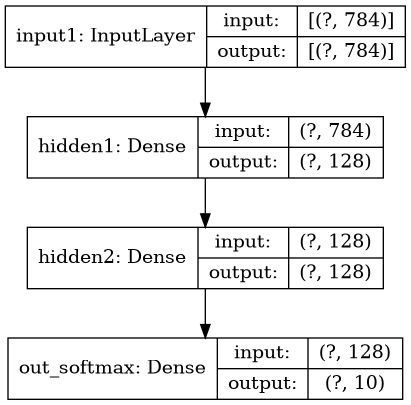

In [12]:
import IPython
from tensorflow.keras.utils import plot_model

# plot_model(model,to_file='result/model.png', show_layer_names=False, show_shapes=True )
plot_model(model,to_file='model.png', show_layer_names=True, show_shapes=True )
IPython.display.Image('model.png')

In [13]:
# model.summary()

---

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [15]:
# network and training
NB_EPOCH = 40
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [16]:
%%time 

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, 
                    epochs=NB_EPOCH,
                    verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 1s 26us/sample - loss: 1.4289 - accuracy: 0.6432 - val_loss: 0.7061 - val_accuracy: 0.8368
Epoch 2/40
48000/48000 [==============================] - 1s 13us/sample - loss: 0.5725 - accuracy: 0.8543 - val_loss: 0.4413 - val_accuracy: 0.8854
Epoch 3/40
48000/48000 [==============================] - 1s 13us/sample - loss: 0.4284 - accuracy: 0.8838 - val_loss: 0.3673 - val_accuracy: 0.8989
Epoch 4/40
48000/48000 [==============================] - 1s 14us/sample - loss: 0.3718 - accuracy: 0.8976 - val_loss: 0.3311 - val_accuracy: 0.9087
Epoch 5/40
48000/48000 [==============================] - 1s 15us/sample - loss: 0.3392 - accuracy: 0.9049 - val_loss: 0.3079 - val_accuracy: 0.9122
Epoch 6/40
48000/48000 [==============================] - 1s 12us/sample - loss: 0.3159 - accuracy: 0.9109 - val_loss: 0.2888 - val_accuracy: 0.9177
Epoch 7/40
48000/48000 [==============================] 

In [17]:
score = model.evaluate(X_test, Y_test, verbose=False)

print('Test accuracy:', score[1])

Test accuracy: 0.9609


---

In [18]:
import matplotlib.pyplot as plt

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

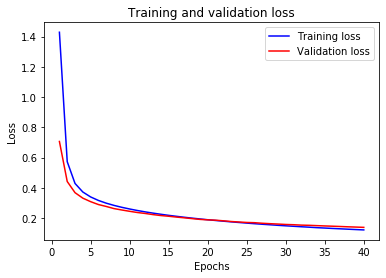

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

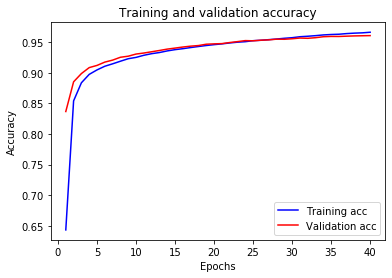

In [21]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

In [23]:
print('tensorflow:', tf.__version__)
print('keras:', keras.__version__)

if tf.test.is_built_with_cuda():
    print('GPU devices:\n  ',
        [ [x.name, x.physical_device_desc] 
          for x in device_lib.list_local_devices() 
          if x.device_type == 'GPU' ]
    )
    print('default GPU device:', tf.test.gpu_device_name() )

else:
    print('no GPU device found')
    

tensorflow: 2.0.0
keras: 2.2.4-tf
GPU devices:
   [['/device:GPU:0', 'device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1']]
default GPU device: /device:GPU:0
